# Simulation running and result analysis

Sample notebook for result analysis on a specific simulation scenario. Shows network generation, how to perform a simulation call, result retrieval and some possible charts

## Network generation

Por ahora un script placeholder. VER: NetworkX para generar redes mas interesantes y graficarlas

In [83]:
import random

def createNetworkFile(nPartNodes, nRelayNodes):
    fileStr = str(nPartNodes) + " " + str(nRelayNodes)
    
    #partNode connections to relays
    for _ in range(0, nPartNodes):
        relays = list(range(0, nRelayNodes))
        random.shuffle(relays)
        fileStr += '\n'
        fileStr += str(relays[0]) + " 0 " + " 0 " + " "
        fileStr += str(relays[1]) + " 0 " + " 0 " + " "
        fileStr += str(relays[2]) + " 0 " + " 0 " + " "
        fileStr += str(relays[3]) + " 0 " + " 0"

    #relay to relay connections
    relayConnMatrix = []
    for relayID in range(0, nRelayNodes):
        relayConnMatrix.append([False for _ in range(0, nRelayNodes)])
    for relayID in range(0, nRelayNodes):
        relays = list(range(0, nRelayNodes))
        random.shuffle(relays)
        for i in range(0, 10):
            relayConnMatrix[relayID][relays[i]] = True
            relayConnMatrix[relays[i]][relayID] = True
    for relayID in range(0, nRelayNodes):
        fileStr += '\n'
        for i in range(0, nRelayNodes):
            if (i != relayID and relayConnMatrix[relayID][i] == True):
                fileStr += str(i) + " 0 " + " 0 " + " "
                
    #save to file  
    file = open('../test_network.nf', 'w')
    file.write(fileStr)    
    file.close()


createNetworkFile(400, 100)

## Run simulation

Run the simulation through command line

In [84]:
import subprocess
subprocess.run("testrun.bat", shell=True, check=True)

CompletedProcess(args='testrun.bat', returncode=0)

## Load run results and transform into CSV

Loads raw simulation logs and transforms them into a more usable CSV file (out.csv)

In [85]:
import re
import csv

with open('..\src\out.log', 'r') as in_file:
    stripped = (line.strip() for line in in_file)

    r = re.compile(r"^\[INFO\]\tS.*")
    stepEvents = filter(r.match, stripped)
    stepEvents = [l[9:].split(" ") for l in stepEvents]
    
    with open("..\out_NodeRPSEvents.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Node ID", "round", "period", "step", "Simulation time (seconds)", "Chronological time (seconds)"])
        writer.writerows(stepEvents)

In [ ]:
with open('..\src\out.log', 'r') as in_file:
    stripped = (line.strip() for line in in_file)

    r = re.compile(r"^\[INFO\]\tTXN.*")
    txnEvents = filter(r.match, stripped)
    txnEvents = [l[12:].split(" ") for l in txnEvents]
    
    with open("..\out_NodeTXNEvents.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Node ID", "round", "period", "step", "Simulation time (seconds)", "Chronological time (seconds)", "Txn ID", "Transaction Type", "Sender Address", "Receiver Address", "Txn Fee"])
        writer.writerows(txnEvents)

## Result analysis and charts

Load csv result file and analyze different stats, concluding the scenario experiment

In [86]:
import pandas as pd

df = pd.read_csv('../out_NodeRPSEvents.csv')
df.head()

,Node ID,round,period,step,Simulation time (seconds),Chronological time (seconds)
0,0,1,0,0,0.0,0.025002
1,0,1,0,1,0.0,0.025002
2,1,1,0,0,0.0,0.025002
3,1,1,0,1,0.0,0.025002
4,2,1,0,0,0.0,0.025537


In [1]:
import pandas as pd

df = pd.read_csv('../out.csv')
df.head()

,Node ID,Account Address,round,period,step,Block hash value,Vote Weight,Simulation time (seconds),Chronological time (seconds)
0,1,249,1,0,0,2,1,0.0,0.002001
1,17,153,1,0,0,18,1,0.0,0.004001
2,23,87,1,0,0,24,1,0.0,0.005002
3,28,4,1,0,0,29,1,0.0,0.005002
4,56,248,1,0,0,57,1,0.0,0.006001


In [2]:
uniqueVoters = df["Account Address"].unique()
print(len(uniqueVoters))

array([249, 153,  87,   4, 248,  93,  83, 123, 230,  98, 203,  92,  42,
       204, 199, 171,  82, 131,  35, 183, 133,  59,  15,  18,  29, 210,
       173, 207, 292,   2,  28,  96, 126, 280, 162, 229, 278,  76, 146,
        66, 190,  73,  78, 287, 233,  27,  64,  37, 160, 132, 206, 253,
       252,  62, 265,  40, 192, 220,  69,  49,  31, 184, 114, 200, 158,
       238, 269, 129, 276, 277, 224, 187, 232, 166, 143, 216, 205, 152,
        38,  90,  57, 284, 274,  25, 294, 279, 211, 198, 108, 236, 245,
       262, 268,  34,  12, 221, 135, 242,  52, 281,  50, 196, 113, 169,
       138, 267,  41,  23, 214,  33, 299, 240, 178,  63, 256,  94, 223,
       120, 235, 122, 111, 188, 296, 201, 150, 213,  61, 270, 227, 156,
       102, 145, 271, 209, 164, 121,  51, 295, 142, 263,  56, 163, 257,
       282, 128, 273, 170,  97,  95, 101, 212, 289, 222, 167, 177,  74,
       161, 275, 218, 140,  79,  70, 228, 103, 193, 147, 241, 155,  48,
       217, 136, 258, 115, 285, 181,  84, 283, 226, 174,  68, 24

<AxesSubplot: title={'center': 'Simtime vs. chronotime'}, xlabel='Simulation time (seconds)'>

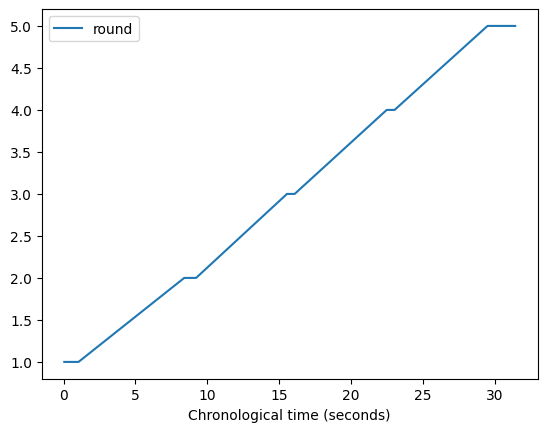

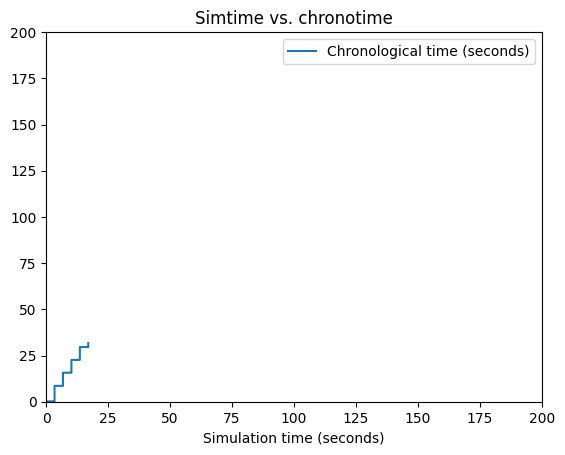

In [87]:
df_node = df[df["Node ID"] == 100]
df_node.plot(x = 'Chronological time (seconds)', y = 'round')

df.plot(x="Simulation time (seconds)", y="Chronological time (seconds)", title="Simtime vs. chronotime", xlim=[0, 200], ylim=[0,200])

## Testing the Notebook

Assuming all the notebooks are under `./notebooks` the following commands will work with Pytest

* Simple commmand:

    `pytest --nbmake notebooks`
* Distributed command (assuming `pytest-xdist` has been installed):

    `pytest --nbmake -n auto notebooks`
* Overwrite the notebooks (by default notebooks are untouched):

    `pytest --nbmake --overwrite notebooks`

### Example: Good Cell

In [1]:
print(f"""
{2**3**5=}
{(2**3)**5=}
{2**(3**5)=}
""")


2**3**5=14134776518227074636666380005943348126619871175004951664972849610340958208
(2**3)**5=32768
2**(3**5)=14134776518227074636666380005943348126619871175004951664972849610340958208



### Example: Bad Cell

By default, an erroring cell will fail the test. Here's an example run:

```sh
❯ pytest --nbmake  notebooks
=== test session starts ===
...
collected 2 items
                                       
notebooks/notebooks_test.ipynb F   [50%]                                                                                                           
notebooks/quadratic_factoring_game.ipynb . [100%]

=== FAILURES ===
/Users/zeph/github/algorand/graviton/notebooks/notebooks_test.ipynb
---------------------------------------------------------------------------
assert 2**3**5 == (2**3)**5, "yeah, I know this is wrong"
---------------------------------------------------------------------------
```

But if we set the path `metadata.execution.allows_errors` in the notebook's JSON to `true`, 
then even though the cell still behaves as expected, it doesn't halt `pytest`'s execution, and `pytest` passes as well.

IE: editing the notebook `*.ipynb` as JSON:

```json
# Set the path `metadata.execution.allows_errors = true`
{
    "cells": [ ... ],
    ...
    "metadata": {
      "execution": {
       "allow_errors": true
      },
    ...
}
```

Now when you run `pytest`, the notebook won't fail even though the cell errors:

```sh
❯ pytest --nbmake notebooks
=== test session starts ===
platform darwin -- Python 3.10.2, pytest-7.1.1, pluggy-1.0.0
rootdir: /Users/zeph/github/algorand/graviton
plugins: hypothesis-6.41.0, xdist-2.5.0, forked-1.4.0, nbmake-1.3.0
collected 2 items                                                                                                                                              

notebooks/notebooks_test.ipynb .           [ 50%]
notebooks/quadratic_factoring_game.ipynb . [100%]
```

In [2]:
assert 2**3**5 == (2**3)**5, "yeah, I know this is wrong"

AssertionError: yeah, I know this is wrong

In [3]:
print("I got here, even though the above failed")

I got here, even though the above failed
